<a href="https://colab.research.google.com/github/Julian6262/the_founder/blob/main/home%20work%2010/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_10_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задача 3, Творческая. Обнаружение маски на лице человека.**

**Датасет можно скачать тут: https://drive.google.com/file/d/1kXnwPII_SBwKa0zYwrzAt034q4L-N3bh/view?usp=sharing**

In [ ]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 796.2 kB/s eta 0:00:00


In [ ]:
from keras import Sequential
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from google.colab import drive, files

In [ ]:
# Подключить Гугл диск
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Просмотреть файлы на диске
!ls "/content/drive/My Drive"

'Colab Notebooks'   Dataset.zip


In [ ]:
# Распаковать датасет
!unzip "/content/drive/My Drive//Dataset.zip" -d ./

In [ ]:
# Количество эпох для обучения и размер батча
EPOCHS = 7
BS = 32

In [ ]:
# Путь к папкам датасета
train_dir = 'Dataset/Train'
val_dir = 'Dataset/Validation'
test_dir = 'Dataset/Test'

# ImageDataGenerator - это генератор изображений. Он может улучшать и расширять образцы данных.
train_datagen = ImageDataGenerator(rescale=1.0 / 255, horizontal_flip=True, zoom_range=0.2, shear_range=0.2)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

Количество изображений для тренировки:
Found 10000 images belonging to 2 classes.
Кол-во с масками: 5000
Кол-во без масок: 5000


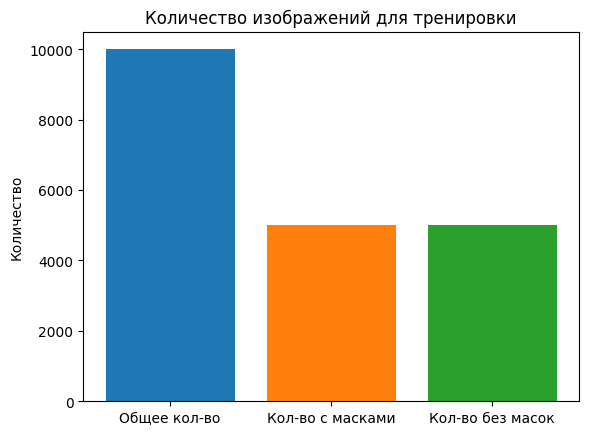

In [ ]:
print('Количество изображений для тренировки:')
train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(224, 224), class_mode='categorical', batch_size=32)

print('Кол-во с масками:', *train_generator.classes[train_generator.classes == 0].shape)
print('Кол-во без масок:', *train_generator.classes[train_generator.classes == 1].shape)

plt.bar('Общее кол-во', train_generator.classes.shape)
plt.bar('Кол-во с масками', train_generator.classes[train_generator.classes == 0].shape)
plt.bar('Кол-во без масок', train_generator.classes[train_generator.classes == 1].shape)
plt.title('Количество изображений для тренировки')
plt.ylabel('Количество')
plt.show()

Количество изображений для валидации:
Found 800 images belonging to 2 classes.
Кол-во с масками: 400
Кол-во без масок: 400


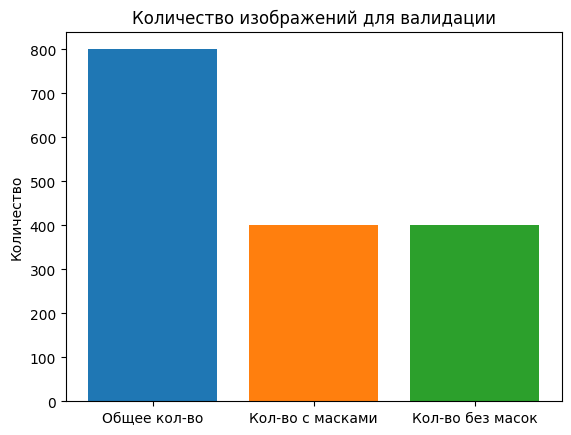

In [ ]:
print('Количество изображений для валидации:')
val_generator = val_datagen.flow_from_directory(directory=val_dir, target_size=(224, 224), class_mode='categorical', batch_size=32)

print('Кол-во с масками:', *val_generator.classes[val_generator.classes == 0].shape)
print('Кол-во без масок:', *val_generator.classes[val_generator.classes == 1].shape)

plt.bar('Общее кол-во', val_generator.classes.shape)
plt.bar('Кол-во с масками', val_generator.classes[val_generator.classes == 0].shape)
plt.bar('Кол-во без масок', val_generator.classes[val_generator.classes == 1].shape)
plt.title('Количество изображений для валидации')
plt.ylabel('Количество')
plt.show()

Количество изображений для теста:
Found 992 images belonging to 2 classes.
Кол-во с масками: 483
Кол-во без масок: 509


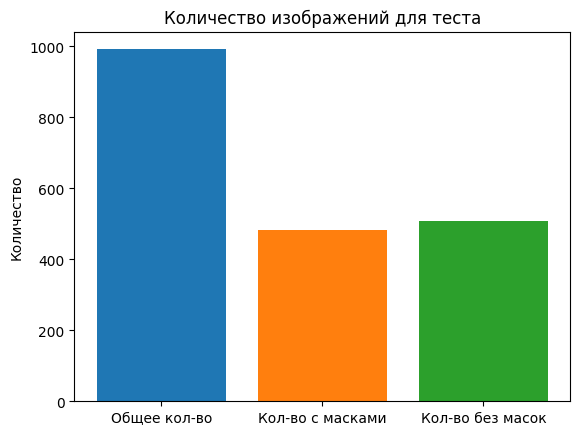

In [ ]:
print('Количество изображений для теста:')
test_generator = val_datagen.flow_from_directory(directory=test_dir, target_size=(224, 224), class_mode='categorical', batch_size=32)

print('Кол-во с масками:', *test_generator.classes[test_generator.classes == 0].shape)
print('Кол-во без масок:', *test_generator.classes[test_generator.classes == 1].shape)

plt.bar('Общее кол-во', test_generator.classes.shape)
plt.bar('Кол-во с масками', test_generator.classes[test_generator.classes == 0].shape)
plt.bar('Кол-во без масок', test_generator.classes[test_generator.classes == 1].shape)
plt.title('Количество изображений для теста')
plt.ylabel('Количество')
plt.show()

In [ ]:
# Разбивка на две категории
print('Лица в масках - категория', test_generator.class_indices['WithMask'])
print('Лица без масок - категория', test_generator.class_indices['WithoutMask'])

Лица в масках - категория 0
Лица без масок - категория 1


In [ ]:
# Модель сверточной нейронной сети (подходит для распознавания изображений)
# на выходе которой, подключена полносвязная сеть из двух слоев
model = Sequential([
    Conv2D(100, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(100, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(70, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Отобразить структуру сети
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 100)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 100)     90100     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 100)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 291600)            0         
                                                                 
 dropout (Dropout)           (None, 291600)            0

In [ ]:
# Обучение модели с подачей тренировочных и валидационных данных
history = model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

Epoch 1/7
313/313 [==============================] - 150s 450ms/step - loss: 0.1560 - accuracy: 0.9487 - val_loss: 0.0442 - val_accuracy: 0.9825
Epoch 2/7
313/313 [==============================] - 135s 432ms/step - loss: 0.0765 - accuracy: 0.9716 - val_loss: 0.0640 - val_accuracy: 0.9762
Epoch 3/7
313/313 [==============================] - 134s 429ms/step - loss: 0.0656 - accuracy: 0.9772 - val_loss: 0.0443 - val_accuracy: 0.9850
Epoch 4/7
313/313 [==============================] - 134s 427ms/step - loss: 0.0507 - accuracy: 0.9817 - val_loss: 0.0348 - val_accuracy: 0.9837
Epoch 5/7
313/313 [==============================] - 135s 433ms/step - loss: 0.0406 - accuracy: 0.9850 - val_loss: 0.0174 - val_accuracy: 0.9900
Epoch 6/7
313/313 [==============================] - 134s 426ms/step - loss: 0.0318 - accuracy: 0.9894 - val_loss: 0.0184 - val_accuracy: 0.9925
Epoch 7/7
313/313 [==============================] - 134s 428ms/step - loss: 0.0299 - accuracy: 0.9888 - val_loss: 0.0165 - val_ac

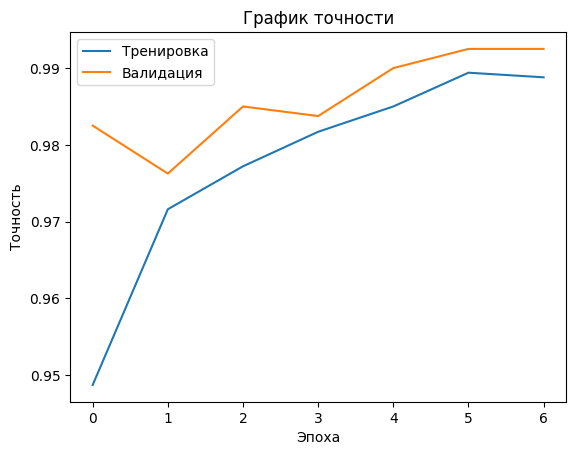

In [ ]:
# График точности
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('График точности')
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.legend(['Тренировка', 'Валидация'], loc='upper left')
plt.show()

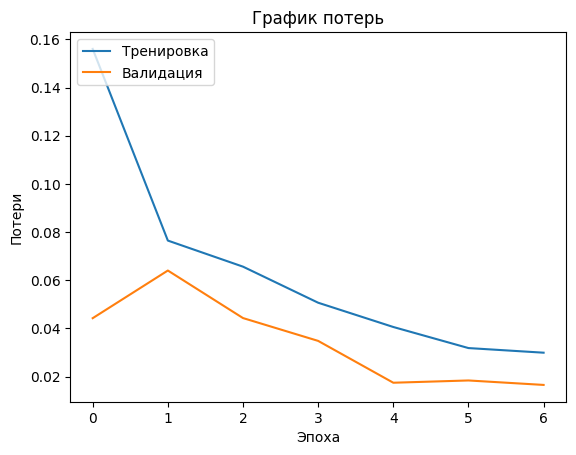

In [ ]:
# График потерь
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График потерь')
plt.ylabel('Потери')
plt.xlabel('Эпоха')
plt.legend(['Тренировка', 'Валидация'], loc='upper left')
plt.show()

In [ ]:
print('Оцениваем потери и точность на тестовых данных')
results = model.evaluate(test_generator, batch_size=BS)
print('Потери на тестовых данных:', results[0])
print('Точность на тестовых данных:', results[1])

Оцениваем потери и точность на тестовых данных
31/31 [==============================] - 2s 69ms/step - loss: 0.0379 - accuracy: 0.9839
Потери на тестовых данных: 0.03785105422139168
Точность на тестовых данных: 0.9838709831237793


31/31 [==============================] - 3s 99ms/step
Confusion Matrix:
 [[221 262]
 [254 255]]


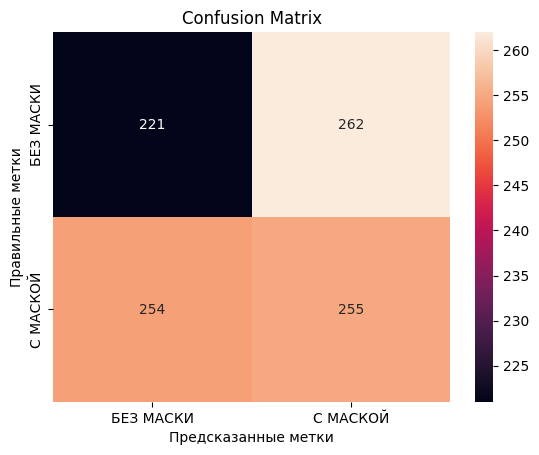

In [ ]:
# Построение confusion matrix
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_test = test_generator.classes
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
ax = plt.subplot()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Предсказанные метки')
ax.set_ylabel('Правильные метки')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['БЕЗ МАСКИ', 'С МАСКОЙ'])
ax.yaxis.set_ticklabels(['БЕЗ МАСКИ', 'С МАСКОЙ'])
plt.show()

In [ ]:
# Функция преобразования файла в массив и его нормализация, загрузка в модель нейросети
# и сгенерируем прогноз (вероятности - выходные данные последнего слоя) на новых изображениях
def predict(file):
    f_image = load_img(file, target_size=(224, 224))
    image = img_to_array(f_image)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    pred = model.predict(image)
    print('Прогноз:', pred)
    print('Расшифровка прогноза:', 'Человек без маски' if np.argmax(pred) else 'Человек в маске')
    return f_image

**Ниже можно загрузить файлы для проверки работы сети**

Saving 050220211912505935751.jpg to 050220211912505935751.jpg
1/1 [==============================] - 0s 383ms/step
Прогноз: [[9.9999988e-01 1.3432266e-07]]
Расшифровка прогноза: Человек в маске


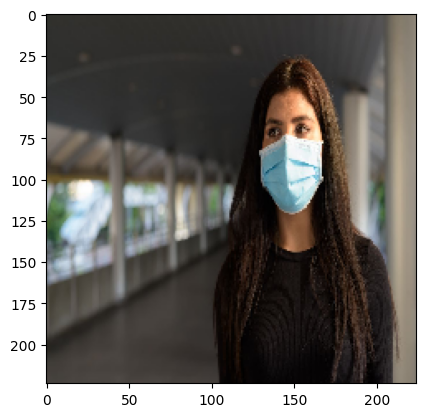

In [ ]:
# Загрузить файл
uploaded = files.upload()

# Выведем изображение
pred_img = predict(*uploaded.keys())
plt.imshow(pred_img)
plt.show()

Saving Depositphotos_355379218_l-2015_2010293.jpg to Depositphotos_355379218_l-2015_2010293.jpg
1/1 [==============================] - 0s 18ms/step
Прогноз: [[9.9964309e-01 3.5694375e-04]]
Расшифровка прогноза: Человек в маске


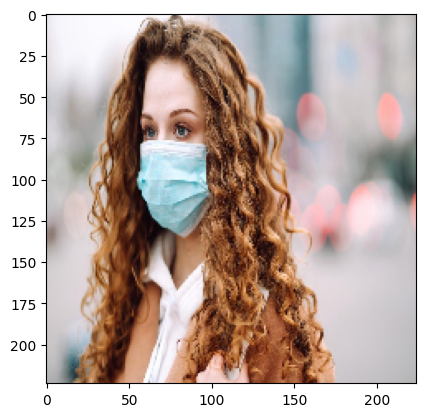

In [ ]:
# Загрузить файл
uploaded = files.upload()

# Выведем изображение
pred_img = predict(*uploaded.keys())
plt.imshow(pred_img)
plt.show()

Saving masque-visage-personnalise-marseille.jpg to masque-visage-personnalise-marseille.jpg
1/1 [==============================] - 0s 18ms/step
Прогноз: [[0.8609404 0.1390596]]
Расшифровка прогноза: Человек в маске


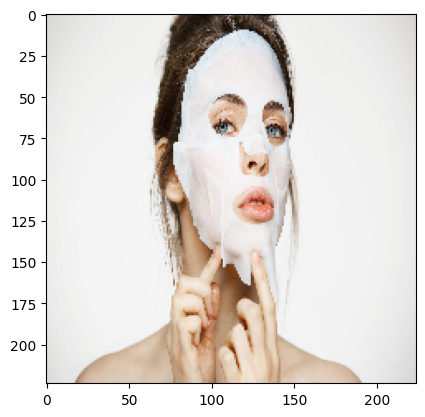

In [ ]:
# Загрузить файл
uploaded = files.upload()

# Выведем изображение
pred_img = predict(*uploaded.keys())
plt.imshow(pred_img)
plt.show()

Saving wgGL5fNFIW4.jpg to wgGL5fNFIW4.jpg
1/1 [==============================] - 0s 18ms/step
Прогноз: [[9.9999976e-01 2.4865099e-07]]
Расшифровка прогноза: Человек в маске


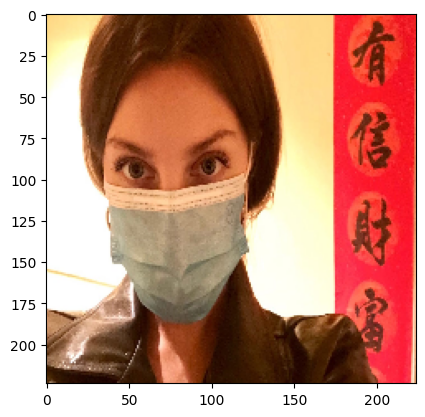

In [ ]:
# Загрузить файл
uploaded = files.upload()

# Выведем изображение
pred_img = predict(*uploaded.keys())
plt.imshow(pred_img)
plt.show()

Saving df073a2758572f97a0da7ba0c5ae314a.jpg to df073a2758572f97a0da7ba0c5ae314a.jpg
1/1 [==============================] - 0s 18ms/step
Прогноз: [[1.0000000e+00 3.7611954e-09]]
Расшифровка прогноза: Человек в маске


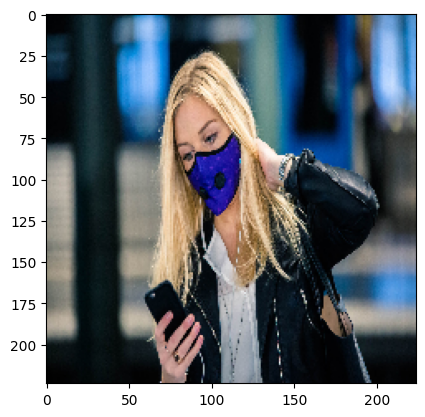

In [ ]:
# Загрузить файл
uploaded = files.upload()

# Выведем изображение
pred_img = predict(*uploaded.keys())
plt.imshow(pred_img)
plt.show()

Saving 5e7b7a9ca7969.jpg to 5e7b7a9ca7969.jpg
1/1 [==============================] - 0s 29ms/step
Прогноз: [[0.11508498 0.88491493]]
Расшифровка прогноза: Человек без маски


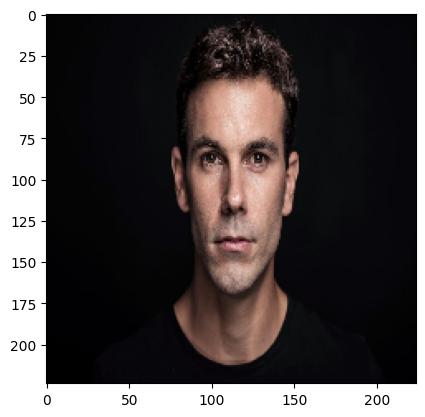

In [ ]:
# Загрузить файл
uploaded = files.upload()

# Выведем изображение
pred_img = predict(*uploaded.keys())
plt.imshow(pred_img)
plt.show()

Saving 8dc62fa6ea2f45ca3363685b1447a711.jpg to 8dc62fa6ea2f45ca3363685b1447a711.jpg
1/1 [==============================] - 0s 19ms/step
Прогноз: [[0.09483907 0.90516096]]
Расшифровка прогноза: Человек без маски


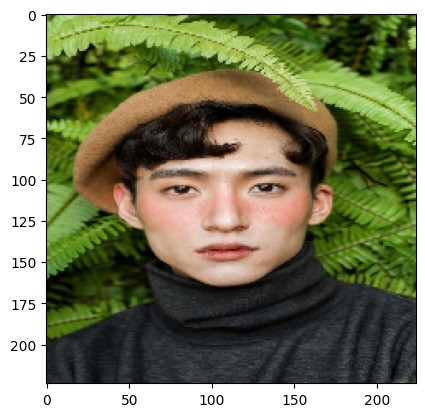

In [ ]:
# Загрузить файл
uploaded = files.upload()

# Выведем изображение
pred_img = predict(*uploaded.keys())
plt.imshow(pred_img)
plt.show()

Saving 94862970_original.jpg to 94862970_original.jpg
1/1 [==============================] - 0s 19ms/step
Прогноз: [[4.262208e-06 9.999957e-01]]
Расшифровка прогноза: Человек без маски


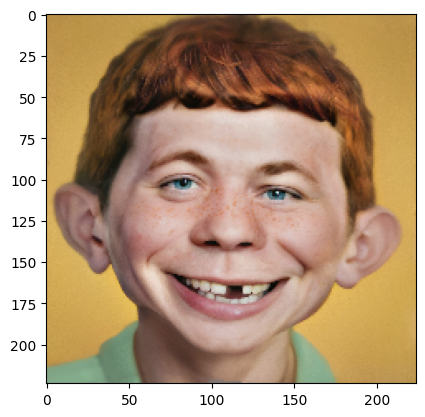

In [ ]:
# Загрузить файл
uploaded = files.upload()

# Выведем изображение
pred_img = predict(*uploaded.keys())
plt.imshow(pred_img)
plt.show()

Saving a992cfb02dd71b2dc22b2f577067ddd8.jpg to a992cfb02dd71b2dc22b2f577067ddd8.jpg
1/1 [==============================] - 0s 17ms/step
Прогноз: [[0.0043619 0.9956381]]
Расшифровка прогноза: Человек без маски


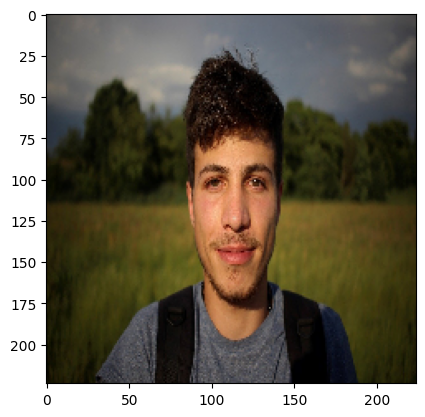

In [ ]:
# Загрузить файл
uploaded = files.upload()

# Выведем изображение
pred_img = predict(*uploaded.keys())
plt.imshow(pred_img)
plt.show()

Saving izobrazhenie_2022-08-20_132405966.jpg to izobrazhenie_2022-08-20_132405966.jpg
1/1 [==============================] - 0s 18ms/step
Прогноз: [[1.0000000e+00 8.9684504e-10]]
Расшифровка прогноза: Человек в маске


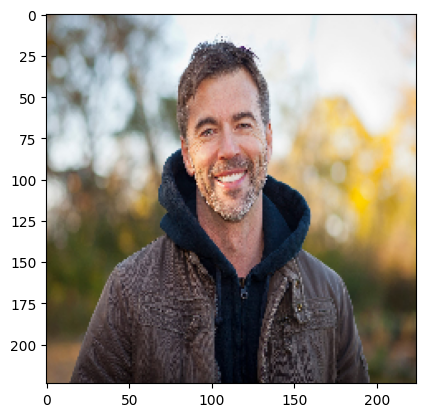

In [ ]:
# Загрузить файл
uploaded = files.upload()

# Выведем изображение
pred_img = predict(*uploaded.keys())
plt.imshow(pred_img)
plt.show()

При использовании сврточных сетей получается хороший результат применительно к изображениям - из 10 поданных, ранее неизвестных данных, получилась только одна ошибка на последнем фото, ито маску сеть спутала с бородой)